In [2]:
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import modin.pandas as pd
import numpy as np
import shapely
from modin.config import ProgressBar
from tqdm.auto import tqdm

ProgressBar.enable()

# Parameter space exploration

In [16]:
wforms = (
    pd.read_parquet("wforms-bat.parquet")
    .join(pd.read_parquet("wforms-ann.parquet"), how="left")
    .join(pd.read_parquet("wforms-occ.parquet", columns=["rho", "cvx"]), how="left")
)

wforms.loc[(wforms["fst_batch"] | wforms["snd_batch"]) & wforms["tt_att"], "status"] = -1
wforms.loc[(wforms["fst_batch"] | wforms["snd_batch"]) & wforms.index.str.startswith("#"), "status"] = np.nan

wforms

Estimated completion of line 2:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 4:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 7:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 8:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

,tt_att,fst_batch,snd_batch,status,category,attestation,notes,rho,cvx
wf,,,,,,,,,
,False,False,False,-1.0,None,None,None,0.058525,-0.589991
##iomimettoaleggere##grata,False,False,False,NaN,None,None,None,0.061684,NaN
#&amp,False,False,False,NaN,None,None,None,0.027360,inf
#007notimetodie,False,False,False,NaN,None,None,None,-0.088546,inf
#00s,False,False,False,NaN,None,None,None,0.077531,-0.102338
...,...,...,...,...,...,...,...,...,...
🖒,False,False,False,NaN,NaN,NaN,NaN,-0.043892,0.512756
🖓,False,False,False,NaN,NaN,NaN,NaN,-0.075612,-inf
🜏,False,False,False,NaN,NaN,NaN,NaN,0.065166,NaN


Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 4:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 5:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 13:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 19:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 25:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 31:   0%           Elapsed time: 00:00, estimated remaining time: ?

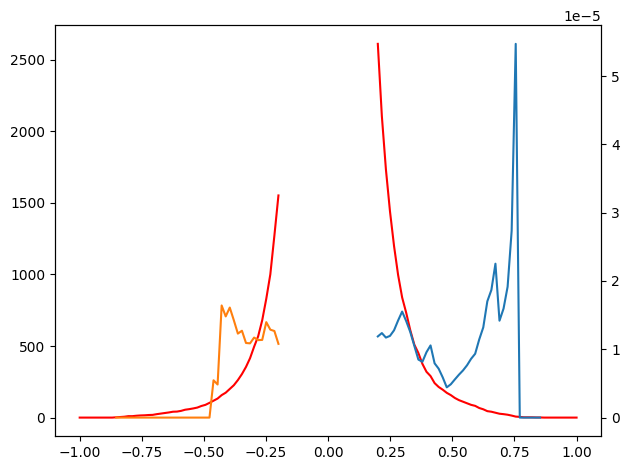

In [14]:
rho_thresholdsp = pd.Series(np.linspace(0.2, 1, 50))
rho_thresholdsn = pd.Series(np.linspace(-1, -0.2, 50))

testp = wforms[(~wforms["tt_att"]) & wforms["fst_batch"] & (wforms["rho"] > 0.2)]
testn = wforms[(~wforms["tt_att"]) & wforms["fst_batch"] & (wforms["rho"] < -0.2)]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    rho_thresholdsp,
    rho_thresholdsp.apply(lambda t: (testp["rho"] >= t).sum()),
    color="red"
)

ax2.plot(
    rho_thresholdsp,
    rho_thresholdsp.apply(lambda t: ((testp["rho"] >= t) & testp["status"].ge(0)).mean())/rho_thresholdsp.apply(lambda t: (testp["rho"] >= t).sum()),
)


ax1.plot(
    rho_thresholdsn,
    rho_thresholdsn.apply(lambda t: (testn["rho"] <= t).sum()),
    color="red"
)

ax2.plot(
    rho_thresholdsn,
    rho_thresholdsn.apply(lambda t: ((testn["rho"] <= t) & testn["status"].ge(0)).mean())/rho_thresholdsn.apply(lambda t: (testn["rho"] <= t).sum()),
)


fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 4:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 5:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 13:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 19:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 25:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 31:   0%           Elapsed time: 00:00, estimated remaining time: ?

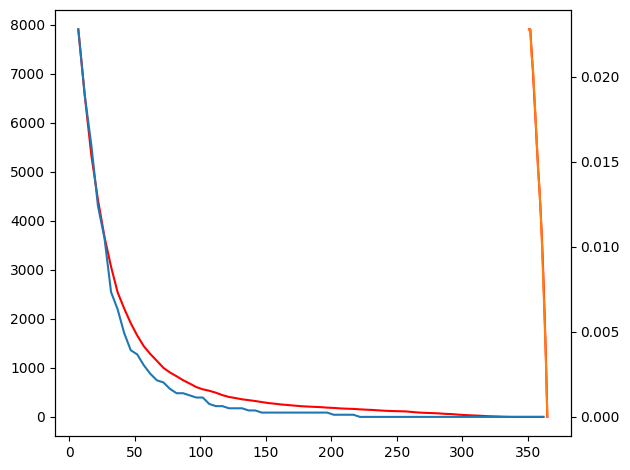

In [4]:
fst_thresholds = pd.Series(np.arange(7,366,5))
lst_thresholds = pd.Series(np.arange(351,366))

testf = wforms[wforms["snd_batch"] & (wforms["fst"] > 7)]
testl = wforms[wforms["snd_batch"] & (wforms["lst"] > 351)]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    fst_thresholds,
    fst_thresholds.apply(lambda t: (testf["fst"] >= t).sum()),
    color="red"
)

ax2.plot(
    fst_thresholds,
    fst_thresholds.apply(lambda t: ((testf["fst"] >= t) & testf["status"].eq(1)).mean()),#/fst_thresholds.apply(lambda t: (testf["fst"] >= t).sum()),
)


ax1.plot(
    lst_thresholds,
    lst_thresholds.apply(lambda t: (testl["lst"] >= t).sum()),
    color="red"
)

ax2.plot(
    lst_thresholds,
    lst_thresholds.apply(lambda t: ((testl["lst"] >= t) & testl["status"].eq(1)).mean()),#/lst_thresholds.apply(lambda t: (testl["lst"] >= t).sum()),
)


fig.tight_layout()
plt.show()

# convexity

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

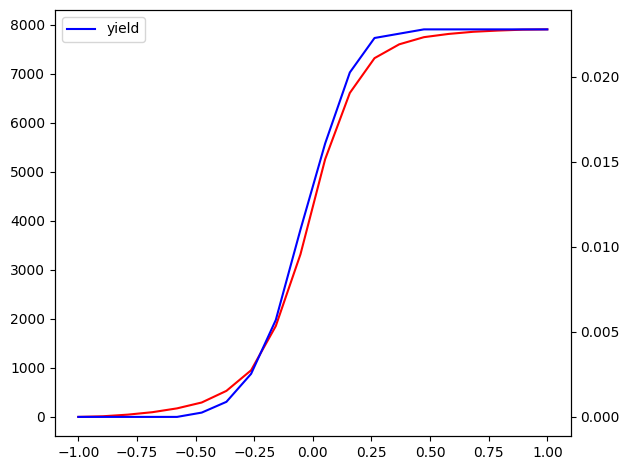

In [39]:
thresholds = pd.Series(np.linspace(-1,+1,20))

test = wforms[wforms["snd_batch"] & ~wforms["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: (test["cvx"] <= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: ((test["cvx"] <= t) & test["status"].eq(1)).mean()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

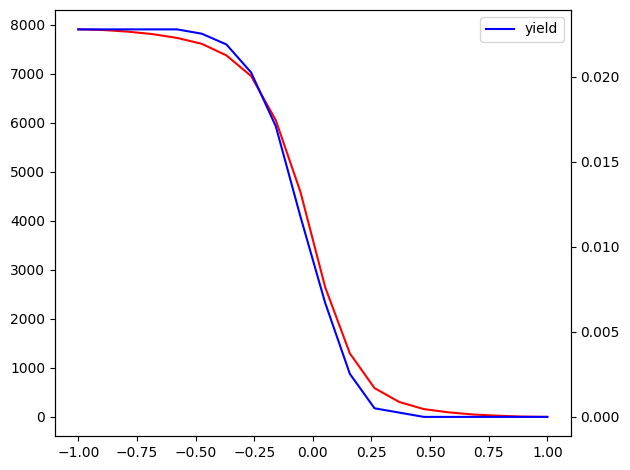

In [37]:
thresholds = pd.Series(np.linspace(-1,+1,20))

test = wforms[wforms["snd_batch"] & ~wforms["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: (test["cvx"] >= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: ((test["cvx"] >= t) & test["status"].eq(1)).mean()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

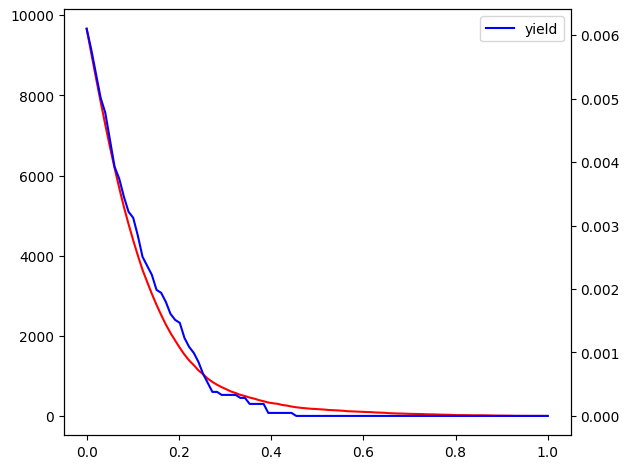

In [25]:
thresholds = pd.Series(np.linspace(0,+1,100))

test = wforms[wforms["snd_batch"] & ~wforms["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: ((test["cvx"]) >= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: (((test["cvx"]) >= t) & test["status"].eq(1)).mean()),#/thresholds.apply(lambda t: ((test["cvx"]) >= t).sum()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

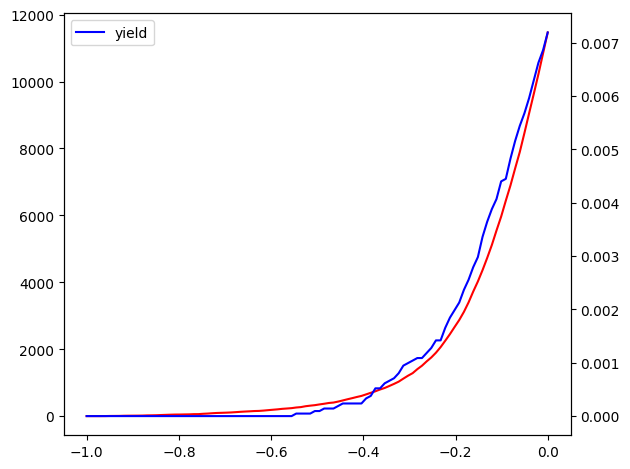

In [27]:
thresholds = pd.Series(np.linspace(-1,0,100))

test = wforms[wforms["snd_batch"] & ~wforms["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: ((test["cvx"]) <= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: (((test["cvx"]) <= t) & test["status"].eq(1)).mean()),#/thresholds.apply(lambda t: ((test["cvx"]) <= t).sum()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

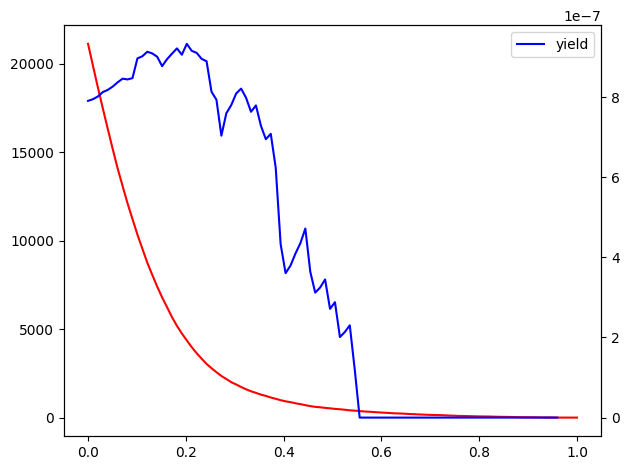

*** SIGTERM received at time=1690500759 on cpu 27 ***
PC: @     0x7f951e2cafde  (unknown)  epoll_wait
    @     0x7f951e1e7520  (unknown)  (unknown)
    @ ... and at least 400 more frames
[2023-07-27 23:32:39,920 E 567381 567381] logging.cc:361: *** SIGTERM received at time=1690500759 on cpu 27 ***
[2023-07-27 23:32:39,921 E 567381 567381] logging.cc:361: PC: @     0x7f951e2cafde  (unknown)  epoll_wait
[2023-07-27 23:32:39,921 E 567381 567381] logging.cc:361:     @     0x7f951e1e7520  (unknown)  (unknown)
[2023-07-27 23:32:39,921 E 567381 567381] logging.cc:361:     @ ... and at least 400 more frames


In [31]:
thresholds = pd.Series(np.linspace(0,+1,100))

test = wforms[wforms["snd_batch"] & ~wforms["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: (abs(test["cvx"]) >= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: ((abs(test["cvx"]) >= t) & test["status"].ge(0)).mean())/thresholds.apply(lambda t: (abs(test["cvx"]) >= t).sum()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()